In [2]:
'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [3]:

data = pd.read_csv('C:/Users/hp/Desktop/appstore_games (2) - appstore_games (2).csv')
print('Dimension of data:', data.shape)

Dimension of data: (17007, 18)


In [3]:
# Converting Date strings to datetime objects
import datetime

data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data['Current_Version_Date'] = pd.to_datetime(data['Current_Version_Date'])
#New column for time gap between release & update
data['Update_Gap']=data.Current_Version_Date-data.Release_Date
# To prevent biased ratings,Drop games that has rating less than 200 user rating count AND 
#(Release Date to Update date) less than 6 months

Low_User_Count=(data[data.User_Rating_Count < 200].index) &\
data[data.Update_Gap < datetime.timedelta(days=175)].index

data.drop(Low_User_Count , inplace=True)

In [4]:
'''Droping unwanted variable'''

data.drop(['URL', 'ID'], axis = 1, inplace = True)
display(data.head())
print('Dimension of data:', data.shape)

,Name,Subtitle,Icon URL,Average User Rating,User_Rating_Count,Price,In-app_Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Release_Date,Current_Version_Date,Update_Gap
0,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126 days
1,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,3478 days
2,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,3105 days
3,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3233 days
4,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,3656 days


Dimension of data: (14506, 17)


In [5]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [6]:
bold('**Variable Description of Data:**')
description(data)

**Variable Description of Data:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Name,object,0,14370,Sudoku,Reversi,Morocco
1,Subtitle,object,9933,4360,NaN,NaN,NaN
2,Icon URL,object,0,14370,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...
3,Average User Rating,float64,9446,9,4,3.5,3
4,User_Rating_Count,float64,9446,1791,3553,284,8376
5,Price,float64,24,22,2.99,1.99,0
6,In-app_Purchases,object,8135,3196,NaN,NaN,NaN
7,Description,object,0,14065,"Join over 21,000,000 of our fans and download ...","The classic game of Reversi, also known as Oth...",Play the classic strategy game Othello (also k...
8,Developer,object,0,7663,Mighty Mighty Good Games,Kiss The Machine,Bayou Games
9,Age Rating,object,0,4,4+,4+,4+


In [7]:
gamestatsfg = data.copy()
gamestatsfg['Genres'] = gamestatsfg['Genres'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
gamestatsfg['Genres'] = gamestatsfg['Genres'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
gamestatsfg['Genres']=gamestatsfg['Genres'].str.strip()
Non_Main_Genre=gamestatsfg[~gamestatsfg.Genres.str.contains('Puzzle') & \
                           ~gamestatsfg.Genres.str.contains('Action') & \
                           ~gamestatsfg.Genres.str.contains('Family')& \
                           ~gamestatsfg.Genres.str.contains('Education')& \
                           ~gamestatsfg.Genres.str.contains('Family')& \
                           ~gamestatsfg.Genres.str.contains('Adventure')&\
                           ~gamestatsfg.Genres.str.contains('Board')&\
                           ~gamestatsfg.Genres.str.contains('Role')].index
gamestatsfg.drop(Non_Main_Genre , inplace=True)
gamestatsfg.loc[gamestatsfg['Genres'].str.contains('Puzzle'),'Genres'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genres'].str.contains('Board'),'Genres'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genres'].str.contains('Action'),'Genres'] = 'Action'
gamestatsfg.loc[gamestatsfg['Genres'].str.contains('Adventure'),'Genres'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genres'].str.contains('Role'),'Genres'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genres'].str.contains('Family'),'Genres'] = 'Family'
gamestatsfg.loc[gamestatsfg['Genres'].str.contains('Education'),'Genres'] = 'Family'

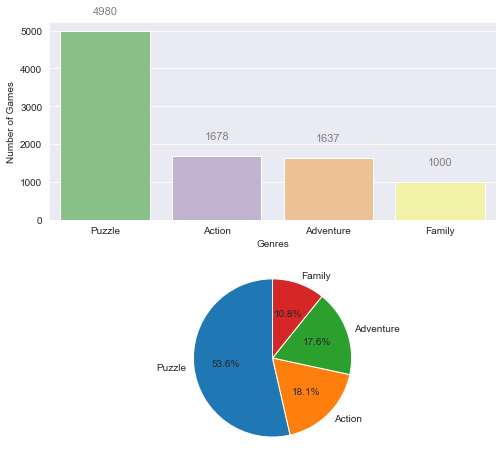

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
f, axes = plt.subplots (2,1, figsize=(8,8))

#Histogram
x=['Puzzle','Action','Adventure','Family']
y = [gamestatsfg.Genres[(gamestatsfg['Genres']=='Puzzle')].count(),gamestatsfg.Genres[(gamestatsfg['Genres']=='Action')].count(),\
     gamestatsfg.Genres[(gamestatsfg['Genres']=='Adventure')].count(),gamestatsfg.Genres[(gamestatsfg['Genres']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent',ax=axes[0])
vis1.set(xlabel='Genres',ylabel='Number of Games')
for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')


#Pie Chart
NG = [gamestatsfg.Genres[(gamestatsfg['Genres']=='Puzzle')].count(),gamestatsfg.Genres[(gamestatsfg['Genres']=='Action')].count(),\
     gamestatsfg.Genres[(gamestatsfg['Genres']=='Adventure')].count(),gamestatsfg.Genres[(gamestatsfg['Genres']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()


plt.ioff()

# Average rating count

**THE MOST FREQUENT RATING IS 4.5 MEASURED**

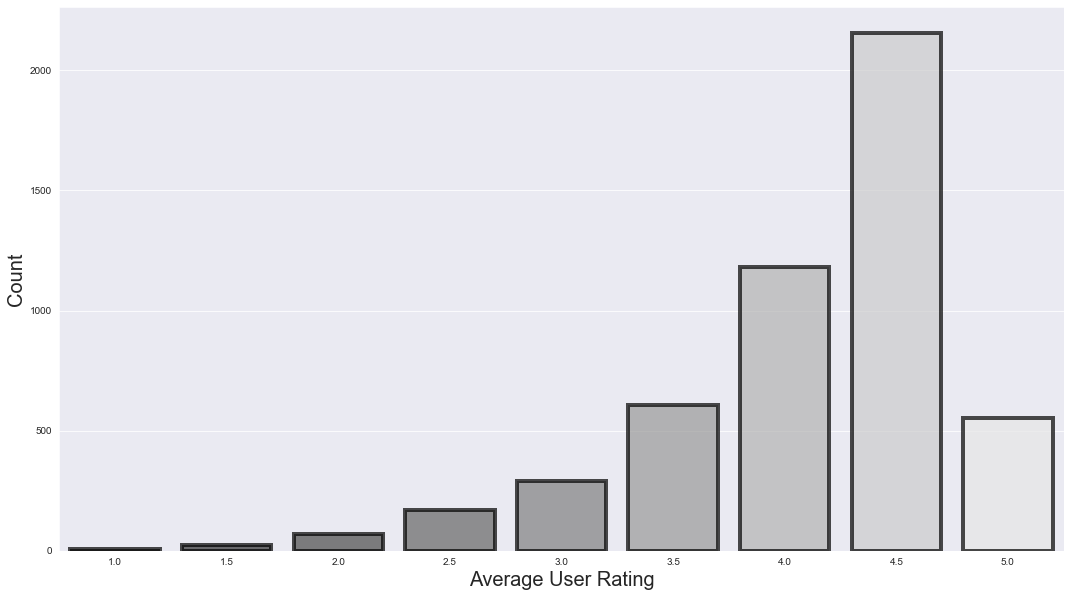

In [9]:
bold('**THE MOST FREQUENT RATING IS 4.5 MEASURED**')
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.countplot(data = data, x ='Average User Rating', palette = 'gray', alpha = 0.7, linewidth=4, edgecolor= 'black')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Average User Rating', fontsize = 20)
plt.show()

 ## User rating count 

**USER RATING COUNT IS HIGHLY POSITIVE SKEWED**

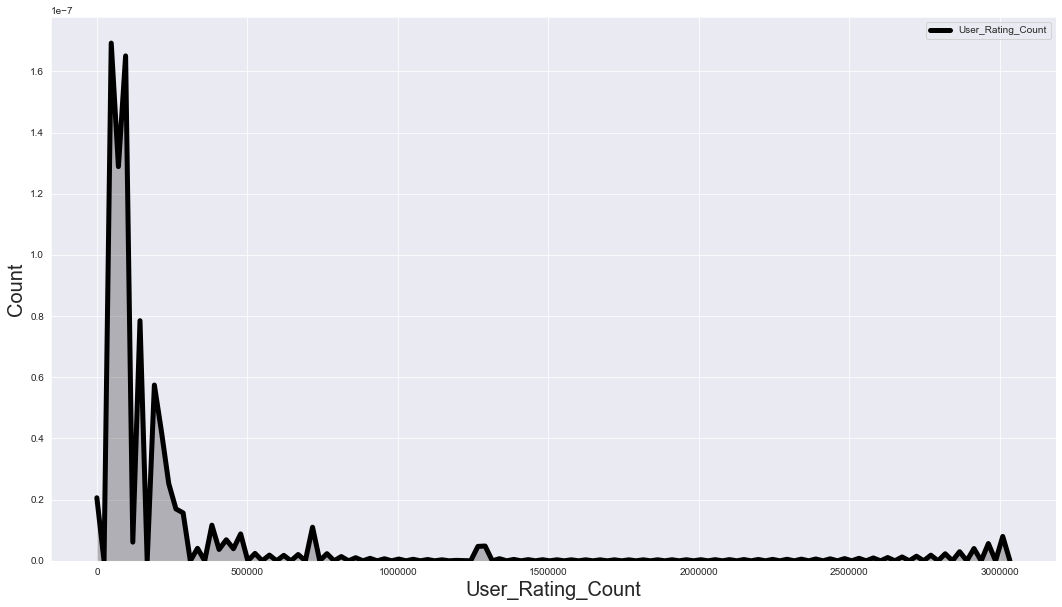

In [10]:
bold('**USER RATING COUNT IS HIGHLY POSITIVE SKEWED**')
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.kdeplot(data['User_Rating_Count'], shade = True, linewidth = 5, color = 'k')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('User_Rating_Count', fontsize = 20)
plt.show()

**GAMES,STRATEGY AND SIMULATION HAVE HIGHER USER RATINGS**

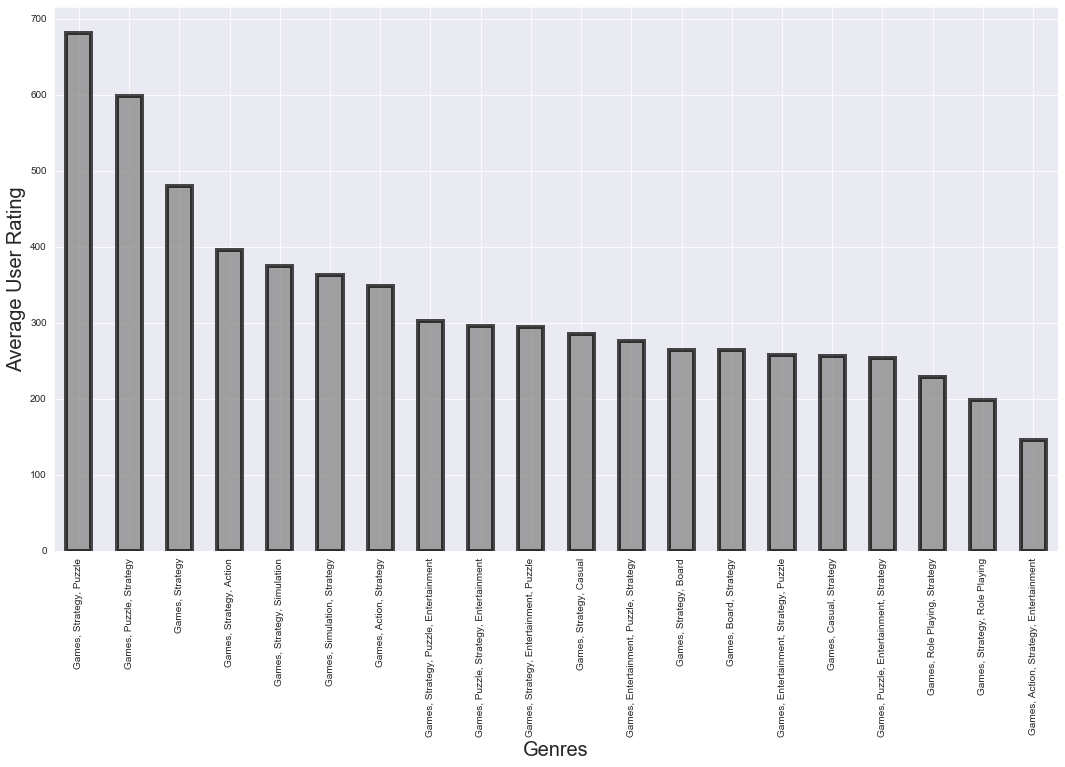

Wall time: 770 ms


In [11]:
%%time
bold('**GAMES,STRATEGY AND SIMULATION HAVE HIGHER USER RATINGS**')
plt.rcParams['figure.figsize'] = (18, 10)
data.Genres.value_counts()[:20].plot(kind='bar',color = 'gray', alpha = 0.7, linewidth=4, edgecolor= 'black')
plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Average User Rating', fontsize = 20)
plt.show()

# Price and Rating(seaborn:regplot,Implot)

In [12]:
price_column = list(map(str, data['Price'].value_counts().sort_index().index))
rating_index = list(map(str, data['Average User Rating'].value_counts().sort_index().index))
pr_table = pd.DataFrame(columns=price_column, index=rating_index)

for price in price_column:
    for rate in rating_index:
        pr_table[price][rate] = len(data[(data['Price']==float(price) )& (data['Average User Rating'] == float(rate))])
        
pr_table

,0.0,0.99,1.99,2.99,3.99,4.99,5.99,6.99,7.99,8.99,...,12.99,14.99,16.99,18.99,19.99,29.99,37.99,99.99,139.99,179.99
1.0,3,0,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5,16,3,1,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,54,7,2,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5,135,16,6,9,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,225,29,14,12,2,7,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3.5,472,52,18,23,8,15,6,5,1,1,...,0,1,0,0,1,0,0,0,0,0
4.0,928,78,43,51,17,37,5,4,3,7,...,2,0,1,0,1,0,0,0,0,0
4.5,1771,87,66,88,40,61,7,9,4,3,...,0,0,0,0,2,0,0,0,1,0
5.0,447,25,21,24,7,17,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0


**THERE IS LITTLE RELATIONSHIP BETWEEN PRICE AND AVERGE USER RATING**

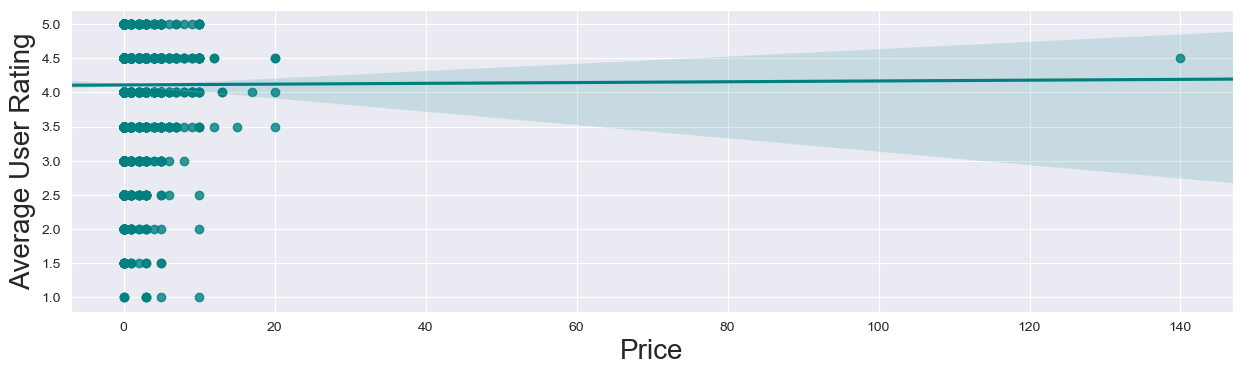

In [18]:
bold('**THERE IS LITTLE RELATIONSHIP BETWEEN PRICE AND AVERGE USER RATING**')
plt.figure(figsize=(15,4), dpi= 100)
ax = sns.regplot(data=data, x='Price', y='Average User Rating', color = 'teal')
ax.set_ylabel('Average User Rating', fontsize = 20)
ax.set_xlabel('Price', fontsize = 20)
plt.show()

In [14]:
price_list = sorted(data['Price'].dropna().unique())
rating_stat = pd.DataFrame(columns=['mean', 'std', 'count'], index=price_list)
for price in price_list:
    tmp = data[data['Price']==price]['Average User Rating'].dropna()
    rating_stat['mean'][price] = tmp.mean()
    rating_stat['std'][price] = tmp.std()
    rating_stat['count'][price] = len(tmp)

rating_stat.T.head(len(price_list))

,0.00,0.99,1.99,2.99,3.99,4.99,5.99,6.99,7.99,8.99,...,12.99,14.99,16.99,18.99,19.99,29.99,37.99,99.99,139.99,179.99
mean,4.12639,3.89226,4.09064,4.04167,4.25333,4.13986,3.95238,4.2,4.15,4.16667,...,4,3.5,4,NaN,4.125,NaN,NaN,NaN,4.5,NaN
std,0.6694,0.753488,0.695976,0.804421,0.522296,0.703126,0.610425,0.497361,0.579751,0.389249,...,0,NaN,NaN,NaN,0.478714,NaN,NaN,NaN,NaN,NaN
count,4051,297,171,216,75,143,21,20,10,12,...,2,1,1,0,4,0,0,0,1,0


In [ ]:
Inference made:

.For simpler games, focus on size between 100MB to 150MB of contents

.For more complex games, target a content of 500MB and above

.On average, the trend shows that the average game size increase of 30MB per/year but small size games are still relatable in the store.

.Puzzle and Family games requires less game updates on average.

.Paid Games tend to have better reviews espeicially those above 9 Dollar scores 4.0 User Rating.